In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

| Attribute        | Type   | Description                                                                                                                                                                                                                                                         |
|------------------|--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| danceability     | double | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                         |
| energy           | double | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.                   |
| key              | double | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.                                                                            |
| loudness         | double | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.                                                                                                    |
| mode             | double | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                     |
| speechiness      | double | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value.                                                                           |
| acousticness     | double | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                         |
| instrumentalness | double | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.                                        |
| liveness         | double | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.                                              |
| valence          | double | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).                  |
| tempo            | double | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.                                                                            |


In [42]:
# spotify data 2023
spotify_data = pd.read_csv('data/spotify_top_10000_1960-now.csv')
# convert track duration to seconds
spotify_data['Track Duration (ms)'] = spotify_data['Track Duration (ms)'] / 1000
# drop rows with missing Artist Genres
spotify_data = spotify_data.dropna(subset=['Artist Genres'])
# drop all columns containing 'URL' or 'URI'
spotify_data = spotify_data[spotify_data.columns.drop(list(spotify_data.filter(regex='URL')))]
spotify_data = spotify_data[spotify_data.columns.drop(list(spotify_data.filter(regex='URI')))]
# drop ISRC, Added By, Added At, Disc Number, Copyrights, Album Genres
spotify_data = spotify_data.drop(columns=['ISRC', 'Added By', 'Added At', 'Disc Number', 'Copyrights', 'Album Genres'])
# add columns for release year and release month
spotify_data['Release Year'] = pd.to_datetime(spotify_data['Album Release Date']).dt.year
spotify_data['Release Month'] = pd.to_datetime(spotify_data['Album Release Date']).dt.month

In [43]:
# create categorical buckets for Popularity (0-20 = 1, 21-40 = 2, 41-60 = 3, 61-80 = 4, 81-100 = 5) save as int64
spotify_data['Popularity_Rating'] = pd.cut(spotify_data['Popularity'], bins=[0, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])
# change NaN (category dtype) to 0
spotify_data['Popularity_Rating'] = spotify_data['Popularity_Rating'].cat.add_categories(0).fillna(0)
# change to int64
spotify_data['Popularity_Rating'] = spotify_data['Popularity_Rating'].astype('int64')
# reset index
spotify_data = spotify_data.reset_index(drop=True)

In [44]:
spotify_data['Artist Genres']
# loop through all genres and create a new column for each genre
for i in range(0, len(spotify_data['Artist Genres'])):
    for genre in spotify_data['Artist Genres'][i].split(','):
        spotify_data.at[i, genre] = 1

# fill NaN with 0
spotify_data = spotify_data.fillna(0)

In [99]:
spotify_data

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Release Year,Release Month,Popularity_Rating,acid house,ambient house,big beat,hip house,dance pop,miami hip hop,pop,album rock,art rock,british invasion,classic rock,folk rock,glam rock,protopunk,psychedelic rock,rock,singer-songwriter,soft rock,yacht rock,electropop,etherpop,indie poptimism,pop r&b,mellow gold,...,australian garage punk,indie rock italiano,italian pop,derby indie,birmingham grime,modern alternative pop,latin arena pop,classic nz country,2-step,dark trap,meme rap,indonesian hip hop,rochester ny indie,manchester indie,canadian psychedelic,deep tech house,finnish alternative rock,progressive trance,zouk,soundtrack,modern reggae,ontario indie,pop quebecois,classic danish pop,nordic soundtrack,welsh rock,modern blues,texas blues,classic dubstep,balkan beats,german house,light music,hmong pop,classic belgian pop,ruta destroy,indie salvadoreno,uk rockabilly,austin singer-songwriter,psychedelic folk rock,atlantic canada hip hop,chanson,birmingham hip hop,filthstep,trancecore,canadian metal,library music,northern irish punk,future house,breaks,experimental house
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,3,216.270,False,0,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,1992,8,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,3,237.120,False,64,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,2009,10,4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,6,312.533,False,56,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,Jive,1999,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,11,233.400,False,42,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,2014,10,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,9,448.720,False,0,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,1969,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,

In [98]:
spotify_data_reduced = spotify_data[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Popularity_Rating', 'Release Year', 'Release Month']]
spotify_data_reduced

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_Rating,Release Year,Release Month
0,0.617,0.872,8.0,-12.305,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,0,1992,8
1,0.825,0.743,2.0,-5.995,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,4,2009,10
2,0.677,0.665,7.0,-5.171,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,3,1999,1
3,0.683,0.728,9.0,-8.920,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,3,2014,10
4,0.319,0.627,0.0,-9.611,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,0,1969,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9444,0.623,0.727,11.0,-5.570,0.0,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,4,2022,6
9445,0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,1,2005,10
9446,0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,4,2000,8
9447,0.534,0.855,1.0,-4.923,0.0,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0,5,2023,1


In [47]:
# new df with only relevant columns (Danceability	Energy	Key	Loudness	Mode	Speechiness	Acousticness	Instrumentalness	Liveness	Valence	Tempo	Time Signature acid house	ambient house	big beat	hip house	dance pop	miami hip hop	pop	album rock	art rock	british invasion	classic rock	folk rock	glam rock	protopunk	psychedelic rock	rock	singer-songwriter	soft rock	yacht rock	electropop	etherpop	indie poptimism	pop r&b	mellow gold	...	australian garage punk	indie rock italiano	italian pop	derby indie	birmingham grime	modern alternative pop	latin arena pop	classic nz country	2-step	dark trap	meme rap	indonesian hip hop	rochester ny indie	manchester indie	canadian psychedelic	deep tech house	finnish alternative rock	progressive trance	zouk	soundtrack	modern reggae	ontario indie	pop quebecois	classic danish pop	nordic soundtrack	welsh rock	modern blues	texas blues	classic dubstep	balkan beats	german house	light music	hmong pop	classic belgian pop	ruta destroy	indie salvadoreno	uk rockabilly	austin singer-songwriter	psychedelic folk rock	atlantic canada hip hop	chanson	birmingham hip hop	filthstep	trancecore	canadian metal	library music	northern irish punk	future house	breaks	experimental house)
spotify_data_reduced_with_genres = spotify_data[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Popularity_Rating', 'Release Year', 'Release Month', 'acid house', 'ambient house', 'big beat', 'hip house', 'dance pop', 'miami hip hop', 'pop', 'album rock', 'art rock', 'british invasion', 'classic rock', 'folk rock', 'glam rock', 'protopunk', 'psychedelic rock', 'rock', 'singer-songwriter', 'soft rock', 'yacht rock', 'electropop', 'etherpop', 'indie poptimism', 'pop r&b', 'mellow gold', 'new wave pop', 'pop', 'post-teen pop', 'viral pop', 'australian garage punk', 'indie rock italiano', 'italian pop', 'derby indie', 'birmingham grime', 'modern alternative pop', 'latin arena pop', 'classic nz country', '2-step', 'dark trap', 'meme rap', 'indonesian hip hop', 'rochester ny indie', 'manchester indie', 'canadian psychedelic', 'deep tech house', 'finnish alternative rock', 'progressive trance', 'zouk', 'soundtrack', 'modern reggae', 'ontario indie', 'pop quebecois', 'classic danish pop', 'nordic soundtrack', 'welsh rock', 'modern blues', 'texas blues', 'classic dubstep', 'balkan beats', 'german house', 'light music', 'hmong pop', 'classic belgian pop', 'ruta destroy', 'indie salvadoreno', 'uk rockabilly', 'austin singer-songwriter', 'psychedelic folk rock', 'atlantic canada hip hop', 'chanson', 'birmingham hip hop', 'filthstep', 'trancecore', 'canadian metal', 'library music', 'northern irish punk', 'future house', 'breaks', 'experimental house']]

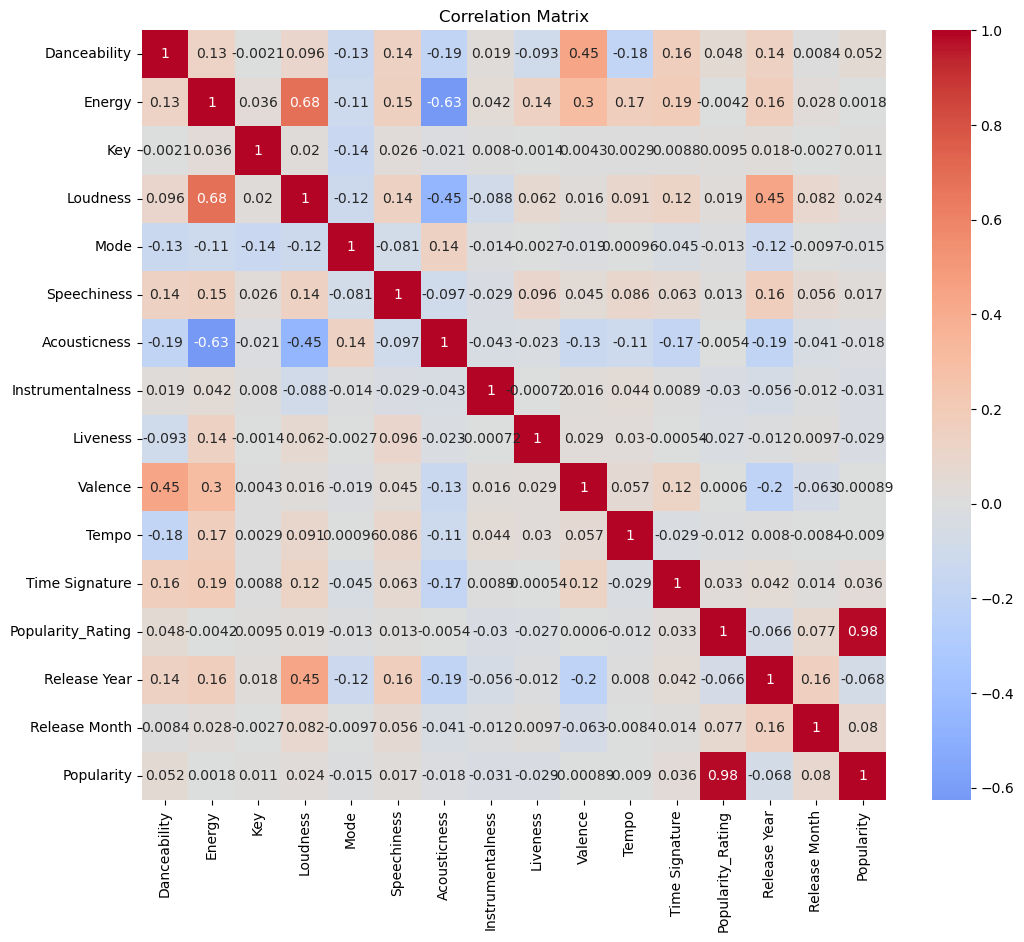

In [97]:
# we now perform a correlation analysis
corr = spotify_data_reduced.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [103]:
# we now perform a random forest analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# drop time signature, mode, release year, release month, key
spotify_data_reduced = spotify_data_reduced.drop(columns=['Time Signature', 'Mode', 'Release Year', 'Release Month', 'Key'])

# split data into training and test set
X = spotify_data_reduced.drop(columns=['Popularity_Rating'])
y = spotify_data_reduced['Popularity_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# predict test set
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# feature importance
feature_importance = clf.feature_importances_
features = X.columns
df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
df = df.sort_values('Importance', ascending=False)
df

Accuracy: 0.2529100529100529


,Feature,Importance
5,Acousticness,0.111595
7,Liveness,0.108475
9,Tempo,0.108439
8,Valence,0.108034
3,Loudness,0.107746
0,Danceability,0.107068
4,Speechiness,0.105872
1,Energy,0.105298
6,Instrumentalness,0.070661
2,Key,0.066812
